# 3D Stage design
A turbine or compressor stage consists of stator-rotor pairs or rotor-rotor pairs. You can chain together multiple stages to design the entire Turbine using this code. Also control the space between the blade rows. 

For the purpose of this tutorial. 
Technical Definitions used: 
- Airfoils are 2D
- Blades are 3D and made up of airfoils.
- Stage is made up of Blades
- Full Turbine Design is made up of multiple stages 

This tutorial takes you through a Full turbine design consisting of multiple stages

> __Note__: The 1D design of a Turbine or compressor is absolutely critical and must not be overlooked. 3D design optimization without changing the inlet and exit flow angles (Velocity triangles) can result in 1-2% efficiency improvement. **Greater improvements can be achieved by optimizing the 1D.**

In [53]:
# Installation
#!pip install pyturbo-aero

In [54]:
# Import scripts
import sys
from typing import List
sys.path.insert(0,'../')
import numpy as np
from pyturbo.aero import Airfoil2D, Airfoil3D, stack_type, Passage2D
from pyturbo.helper import exp_ratio, bezier, pw_bezier2D

## Creating a Stator Blade
Stator are non-rotating. The purpose of the stator is to guide the flow into the rotor in such a way that maximizes the power and efficiency. The design is govern by the velocity triangles found using 1D design or streamline design approach. 

Below is an example of creating a stator blade using a hub, mid, and tip profiles. You can have as many profiles as you want, just specify where they are located when instantiating the 3D airfoil



### Hub Profile

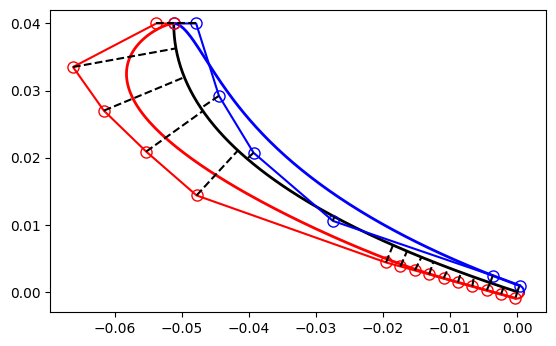

In [55]:
stator_hub_axial_chord = 0.040
#This creates the camberline
stator_hub = Airfoil2D(alpha1=0,alpha2=72,axial_chord=stator_hub_axial_chord,stagger=52) 
stator_hub.le_thickness_add(0.04)

ps_height = [0.0500,0.0200,-0.0100] # These are thicknesses 
stator_hub.ps_thickness_add(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.2400, 0.2000, 0.1600, 0.1400]
stator_hub.ss_thickness_add(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)

stator_hub.le_thickness_match()
stator_hub.te_create(radius=0.001,wedge_ss=2.5,wedge_ps=2.4)
stator_hub.flow_guidance2(10)
stator_hub.plot()

### Mid Profile

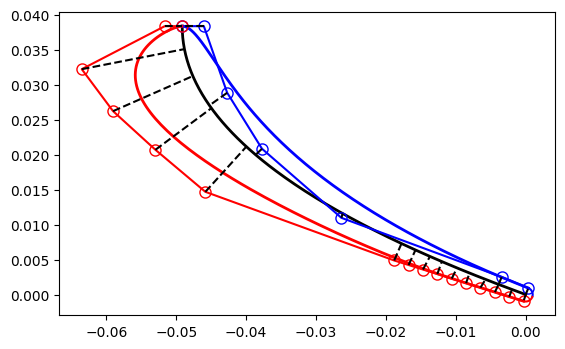

In [56]:
stator_mid = Airfoil2D(alpha1=0,alpha2=70,axial_chord=stator_hub_axial_chord*0.96,stagger=52) 
stator_mid.le_thickness_add(0.04)

ps_height = [0.0500,0.0200,-0.0100] # These are thicknesses 
stator_mid.ps_thickness_add(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.2400, 0.2000, 0.1600, 0.1400]
stator_mid.ss_thickness_add(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)

stator_mid.le_thickness_match()
stator_mid.te_create(radius=0.001,wedge_ss=2.5,wedge_ps=2.4)
stator_mid.flow_guidance2(10)
stator_mid.plot()

### Tip Profile

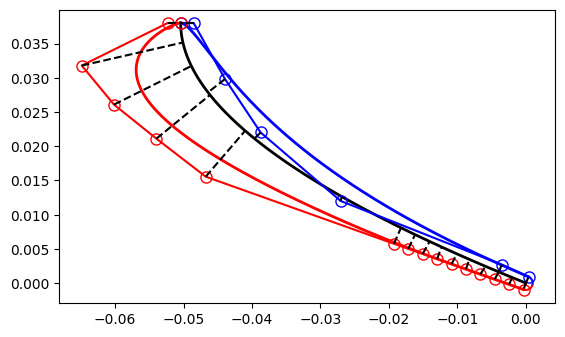

In [57]:
stator_tip = Airfoil2D(alpha1=0,alpha2=68,axial_chord=stator_hub_axial_chord*0.95,stagger=53) 
stator_tip.le_thickness_add(0.03)

ps_height = [0.0500,0.0200,-0.0100] # These are thicknesses 
stator_tip.ps_thickness_add(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.2400, 0.2000, 0.1600, 0.1400]
stator_tip.ss_thickness_add(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)

stator_tip.le_thickness_match()
stator_tip.te_create(radius=0.001,wedge_ss=2.5,wedge_ps=2.4)
stator_tip.flow_guidance2(10)
stator_tip.plot()

### 3D Stator Blade
Notice that profileArray contains all the hub, mid, tip profiles. The location of these profiles are passed as percentages in profile_loc. 

The height doesn't really matter because when we construct the passage curves for hub and shroud, the height will automatically be scaled.

Stacking of the stator is done using the leading edge point. This can be changed to centroid or trailing_edge. 

In [58]:
stator3D = Airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip], profile_loc=[0.0,0.5,1.0], height = 0.04)
stator3D.stack(stack_type.leading_edge) # stators are typically stacked with leading edge; stators with centroid or trailing edge
stator3D.sweep(sweep_y=[0,-0.05,0.05], sweep_z=[0.0, 0.5, 1]) # Z =1 is blade tip, Z = 0 is blade hub. The units are in percentage 
stator3D.lean(leanX=[0,0.01,-0.02],leanZ=[0,0.5,1])
stator3D.create_blade(nProfiles=20,num_points=160,trailing_edge_points=20)

Equal Spacing: 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]


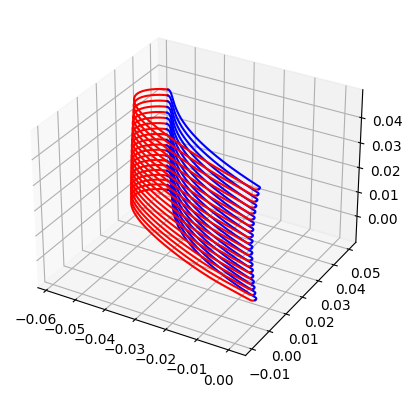

In [59]:
stator3D.plot()

## Creating a Rotor Blade 
Notice the difference in metal turning angle and stagger angle compared to the stator 2D airfoils. The other change is to the suction side wedge angle. 

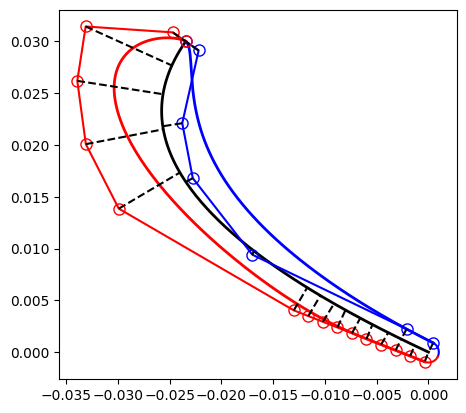

In [60]:
### Hub Profile
rotor_axial_chord = 0.030
rotor_hub = Airfoil2D(alpha1=35,alpha2=65,axial_chord=rotor_axial_chord,stagger=38) 
rotor_hub.le_thickness_add(0.04)

ps_height = [0.0500,0.0200,-0.0100] # These are thicknesses 
rotor_hub.ps_thickness_add(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.2400, 0.2200, 0.2000, 0.1800]
rotor_hub.ss_thickness_add(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)

rotor_hub.le_thickness_match()
rotor_hub.te_create(radius=0.001,wedge_ss=3.5,wedge_ps=2.4)
rotor_hub.flow_guidance2(10)
rotor_hub.plot()

### Mid Profile

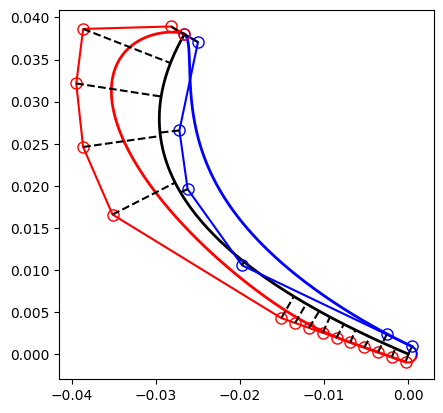

In [61]:
rotor_mid = Airfoil2D(alpha1=30,alpha2=67,axial_chord=0.038,stagger=35) 
rotor_mid.le_thickness_add(0.04)

ps_height = [0.0500,0.0200,-0.0100] # These are thicknesses 
rotor_mid.ps_thickness_add(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.2400, 0.2200, 0.2000, 0.1800]
rotor_mid.ss_thickness_add(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)

rotor_mid.le_thickness_match()
rotor_mid.te_create(radius=0.001,wedge_ss=3.5,wedge_ps=2.4)
rotor_mid.flow_guidance2(10)
rotor_mid.plot()

### Tip Profile

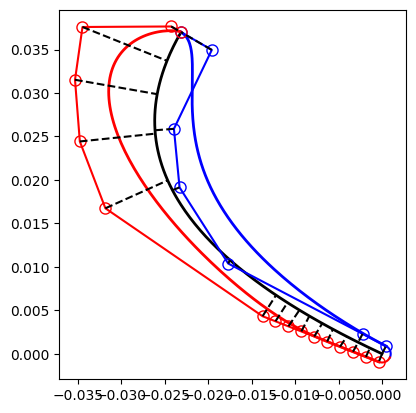

In [62]:
rotor_tip = Airfoil2D(alpha1=30,alpha2=65,axial_chord=0.037,stagger=32) 
rotor_tip.le_thickness_add(0.03)

ps_height = [0.0500,0.0200,-0.0100] # These are thicknesses 
rotor_tip.ps_thickness_add(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.2400, 0.2200, 0.2000, 0.1800]
rotor_tip.ss_thickness_add(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)

rotor_tip.le_thickness_match()
rotor_tip.te_create(radius=0.001,wedge_ss=3.5,wedge_ps=2.4)
rotor_tip.flow_guidance2(10)
rotor_tip.plot()

### 3D Rotor Blade 
This is defined similarly to the stator blade. The only difference is the centroid stacking. 

Equal Spacing: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]


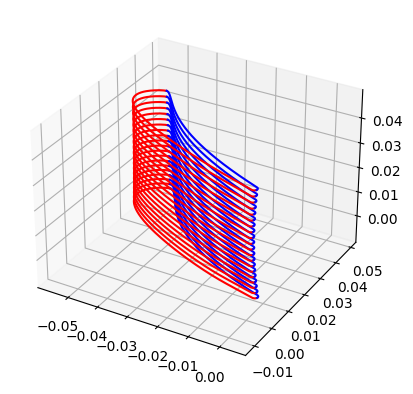

In [63]:
#%% Rotor 3D 
rotor3D = Airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.04)
rotor3D.stack(stack_type.centroid) # stators are typically stacked with leading edge; stators with centroid or trailing edge
rotor3D.sweep(sweep_y=[0,-0.05,0.05], sweep_z=[0.0, 0.5, 1]) # Z =1 is blade tip, Z = 0 is blade hub. The units are in percentage 
rotor3D.lean(leanX=[0,0.01,-0.02],leanZ=[0,0.5,1])
rotor3D.create_blade(nProfiles=20,num_points=160,trailing_edge_points=20)
rotor3D.plot()

## Matching the beginning slope
The code below modifies the bezier curve to add an extra control point after the starting point to match the first derivative at the end of the previous bezier curve. Having something like this is useful for creating a smooth continous curve. Tweaks can be made to the second point to match the 2nd derivative if needed. 



In [64]:
def match_end_slope(bezier1:bezier, x:List[float],y:List[float]):
    """Creates another bezier curve that matches the slope at the end of bezier 1

    Args:
        bezier1 (bezier): 
        x (List[float]): Bezier control points 
        y (List[float]): Bezier control points 

    Returns:
        bezier: new bezier curve containing control points x,y with extra points interjected at the 2nd index x[1],y[1] to match the end slope of bezier1
    """
    # Look at the last 2 points of the previous bezier curve. These 2 points control the slope
    x1 = bezier1.x[-2:] 
    y1 = bezier1.y[-2:]
    
    dx = np.diff(x1)[0]    # Find the spacing
    dy = np.diff(y1)[0]
    x2 = x[0]+dx
    y2 = y[0]+dy 
    
    d1 =2; d2=1 # Set these values so loop is executed.
    while d1>d2:    # Loop exists so that new points fall in between existing points 
        # Add extra control point (x2,y2) into list, need to adjust control point
        dx = x[0]-x2
        dy = y[0]-y2
        d1 = np.sqrt((dx)**2 + (dy)**2) 
        d2 = np.sqrt((x[0]-x[1])**2 + (y[0]-y[1])**2)
        
        if d1>d2:
            x2 += dx*0.2 # Reduce both by 80%, this keeps the slope the same 
            y2 += dy*0.2
        
    x.insert(1,x2)
    y.insert(1,y2)

    b = bezier(x,y)
    return b 


## Endwalls
The code below demonstrates how to create the Hub and Shroud curves. 
To change the shroud height, just change the rtip. Modifying the hub_tip_ratio increases the passage area.

In [65]:
# Endwalls Parameters
rtip = 0.25 # meters
hub_tip_ratio = 0.8
rhub = rtip*hub_tip_ratio
stator_rotor_gap = 0.010

### Hub
The hub profiles are separated into 
1. Inlet to Stator leading edge
2. Stator Leading edge to Mid Stator-Rotor gap 
3. Mid Stator-Rotor gap to Rotor TE + 0.5*Stator-Rotor gap

In [66]:
rhub_expansion_coeff1 = [1.0,0.98,0.97] # Stator 
zhub_expansion_coeff1 = [0.25,0.75] 

# This makes the flowpath going from inlet to stator leading edge 
rhub_points1 = [rhub, rhub]  # 1.5x Stator Inlet, stator_inlet, stator_mid
zhub_points1 = [-1.5*stator_hub_axial_chord,0]
hub_bezier1 = bezier(zhub_points1,rhub_points1)

# Flowpath from stator leading edge to trailing edge 
rhub_points2 = [rhub]
zhub_points2 = [0] 
rhub_points2.append(rhub*rhub_expansion_coeff1[0])                      # Mid bezier control point
zhub_points2.append(stator_hub_axial_chord*zhub_expansion_coeff1[0])

rhub_points2.append(rhub*rhub_expansion_coeff1[1])                      # End bezier control point
zhub_points2.append(stator_hub_axial_chord*zhub_expansion_coeff1[1])

rhub_points2.append(rhub*rhub_expansion_coeff1[2])                      # End bezier point
zhub_points2.append(stator_hub_axial_chord+stator_rotor_gap*0.5)

rhub_points2 = np.array(rhub_points2)
zhub_points2 = np.array(zhub_points2)

hub_bezier2 = match_end_slope(hub_bezier1,zhub_points2.tolist(),rhub_points2.tolist())

# Mid stator-rotor gap to rotor_te + stator-rotor gap 
rhub_expansion_coeff2 = [0.99,0.98,1.0,1.0] # Rotor
zhub_expansion_coeff2 = [0.5,0.80]
rhub_points3 = [rhub_points2[-1]]
zhub_points3 = [zhub_points2[-1]] # This will be adjusted at the end

rhub_points3.append(rhub_points2[-1]*rhub_expansion_coeff2[0]) # Rotor Inlet 
zhub_points3.append(zhub_points2[-1]+stator_rotor_gap*0.5)

rhub_points3.append(rhub_points2[-1]*rhub_expansion_coeff2[1]) # Rotor Mid 
zhub_points3.append(zhub_points2[-1]+stator_rotor_gap*0.5+rotor_axial_chord*zhub_expansion_coeff2[0])

rhub_points3.append(rhub_points2[-1]*rhub_expansion_coeff2[2]) # Rotor TE
zhub_points3.append(zhub_points2[-1]+stator_rotor_gap*0.5+rotor_axial_chord*zhub_expansion_coeff2[1])

rhub_points3.append(rhub_points2[-1]*rhub_expansion_coeff2[3]) # Rotor TE + stator_rotor_gap
zhub_points3.append(zhub_points2[-1]+stator_rotor_gap*0.5+rotor_axial_chord+stator_rotor_gap*0.5)

rhub_points3 = np.array(rhub_points3)
zhub_points3 = np.array(zhub_points3)

hub_bezier3 = match_end_slope(hub_bezier2,zhub_points3.tolist(),rhub_points3.tolist())

rhub_points4 = [rhub_points3[-1], rhub_points3[-1]]
zhub_points4 = [zhub_points3[-1], zhub_points3[-1]+2.5*rotor_axial_chord]
hub_bezier4 = match_end_slope(hub_bezier3,zhub_points4,rhub_points4)

### Shroud
Shroud profiles are defined similarly to the hub profiles


In [67]:
rshroud_expansion_coeff1 = [1.04,1.05,1.06] # Stator 
zshroud_expansion_coeff1 = [0.25,0.9] 

# This makes the flowpath going from inlet to stator leading edge 
rshroud_points1 = [rtip, rtip]  # 1.5x Stator Inlet, stator_inlet, stator_mid
zshroud_points1 = [-1.5*stator_hub_axial_chord,0]
shroud_bezier1 = bezier(zshroud_points1,rshroud_points1)

# Flowpath from stator leading edge to trailing edge 
rshroud_points2 = [rtip]
zshroud_points2 = [0] 
rshroud_points2.append(rtip*rshroud_expansion_coeff1[0])                      # Mid bezier control point
zshroud_points2.append(stator_hub_axial_chord*0.5)

rshroud_points2.append(rtip*rshroud_expansion_coeff1[1])                      # End bezier control point
zshroud_points2.append(stator_hub_axial_chord*0.5+stator_hub_axial_chord*0.5*zshroud_expansion_coeff1[0])

rshroud_points2.append(rtip*rshroud_expansion_coeff1[2])                      # End bezier point
zshroud_points2.append(stator_hub_axial_chord+stator_rotor_gap*0.5)

rshroud_points2 = np.array(rshroud_points2)
zshroud_points2 = np.array(zshroud_points2)

shroud_bezier2 = match_end_slope(shroud_bezier1,zshroud_points2.tolist(),rshroud_points2.tolist())

# Mid stator-rotor gap to rotor_te + stator-rotor gap 
rshroud_expansion_coeff2 = [1.0,1.0,1.0,1.0] # Rotor
zshroud_expansion_coeff2 = [0.40,0.8]
rshroud_points3 = [rshroud_points2[-1]]
zshroud_points3 = [zshroud_points2[-1]] # This will be adjusted at the end

rshroud_points3.append(rshroud_points2[-1]*rshroud_expansion_coeff2[0]) # Rotor Inlet 
zshroud_points3.append(zshroud_points2[-1]+stator_rotor_gap*0.5)

rshroud_points3.append(rshroud_points2[-1]*rshroud_expansion_coeff2[1]) # Rotor Mid 
zshroud_points3.append(zshroud_points2[-1]+stator_rotor_gap*0.5+rotor_axial_chord*zshroud_expansion_coeff2[0])

rshroud_points3.append(rshroud_points2[-1]*rshroud_expansion_coeff2[2]) # Rotor TE
zshroud_points3.append(zshroud_points2[-1]+stator_rotor_gap*0.5+rotor_axial_chord*zshroud_expansion_coeff2[1])

rshroud_points3.append(rshroud_points2[-1]*rshroud_expansion_coeff2[3]) # Rotor TE + stator_rotor_gap
zshroud_points3.append(zshroud_points2[-1]+stator_rotor_gap*0.5+rotor_axial_chord+stator_rotor_gap*0.5)

rshroud_points3 = np.array(rshroud_points3)
zshroud_points3 = np.array(zshroud_points3)

shroud_bezier3 = match_end_slope(shroud_bezier2,zshroud_points3.tolist(),rshroud_points3.tolist())

rshroud_points4 = [rshroud_points3[-1], rshroud_points3[-1]]
zshroud_points4 = [zshroud_points3[-1], zshroud_points3[-1]+2.5*rotor_axial_chord]
shroud_bezier4 = match_end_slope(shroud_bezier3,zshroud_points4,rshroud_points4)

The code below joins the bezier curves kind of like a piecewise curve. I wrote it to simplify my life. It also plots all the curves. 

In [68]:
hub_bezier = pw_bezier2D([hub_bezier1,hub_bezier2,hub_bezier3,hub_bezier4])
shroud_bezier = pw_bezier2D([shroud_bezier1,shroud_bezier2,shroud_bezier3,shroud_bezier4])

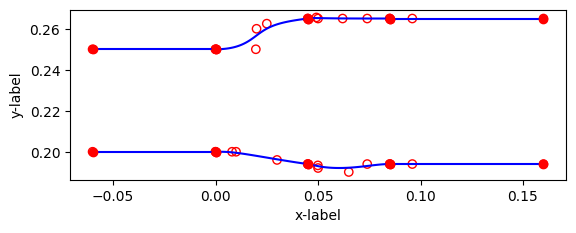

In [69]:
shroud_bezier.plot()
hub_bezier.plot()

## Creating the Passage in 2D
Before we just add the blades. WE have to pay attention to how the geometry was created. The leading edge to trailing edge (Axial) is defined in the "Y" direction. R-Theta is in the "X" direction. This needs to be changed before we insert the geometry. 

The code below flips and rotates the geometry.

In [70]:
stator3D.center_le()
stator3D.flip_cw()
stator3D.rotate(cx=0,cy=0,angle=90)

rotor3D.center_le()
rotor3D.flip_cw()
rotor3D.rotate(cx=0,cy=0,angle=90)

Now that the geometry is orientated propperly, we can add it to a 2D Passage.

In [71]:
passage = Passage2D([stator3D,rotor3D],[stator_rotor_gap])

zhub,rhub = hub_bezier.get_point(np.linspace(0,1,100))
zshroud,rshroud = shroud_bezier.get_point(np.linspace(0,1,100))
passage.add_endwalls(zhub,rhub,zshroud,rshroud)
passage.blade_fit(0)


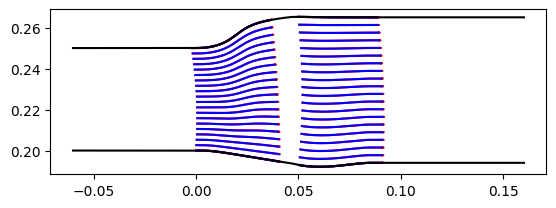

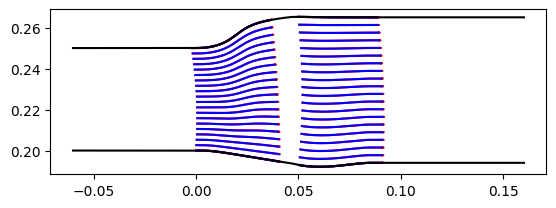

In [72]:
passage.plot2D()

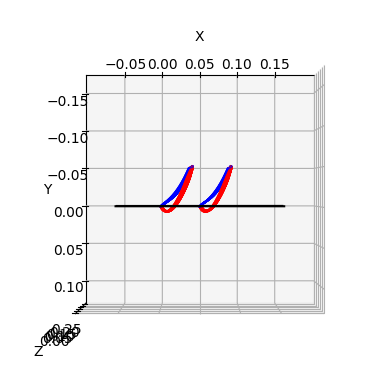

In [73]:
fig = passage.plot3D()

The passage data can now be exported to a json or a dat file. If you are using a CFD Program like Numeca or ADS, I encourage you to look at the code for export_dat or json and create your own code to export to the CFD's specific format. Please share the code with others and/or contact me and we can work on including your code in the codebase. 

In [74]:
passage.export_json()
passage.export_dat()

In [76]:
!cat aero_geometry.dat

'cat' is not recognized as an internal or external command,
operable program or batch file.
